In [72]:
### IMPORTS

%matplotlib inline
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

#set font size of plots to 22
matplotlib.rcParams.update({"font.size":22})

In [73]:
N = 101
hypothesis = range(0, N)
SANTUGON = 0
TAPAT = 1
data0 = [SANTUGON] * 110
data1 = [TAPAT] * 132
data = data0 + data1

In [74]:
# Our priors will be uniformly distributed:
def initPriors(hypothesis):
    pH = []
    
    # get pH
    for h in hypothesis:
        pH.append(1/len(hypothesis))
    return pH     # set each prior to a uniform value

prior = initPriors(hypothesis)

In [75]:
def likelihood(data, hypothesis):
    
    pDH = []
    for h in hypothesis:
        if(data == TAPAT):
            pDH.append(h/100)
        else:
            pDH.append((1 - h/100))
    
    return pDH

In [76]:
def likelihood(data, hypothesis, y):
    pDH = []
    for h in hypothesis:
        if(data == TAPAT):
            pDH.append((h/100*(1-y)) + ((1-h/100)*y))
        else:
            pDH.append((1-h/100)*(1-y) + ((h/100)*y))
    return pDH

In [77]:
def update(hypo, prior, data):
    # for each hypothesis, calculate P(H) * P(D|H), or the prior times the likelihood
    
    # get pHpDH
    pHpDH = []
    pDH = likelihood(data, hypo)
    pSum = 0
    for i in range(0,len(hypo)):
        pHpDH.append(prior[i] * pDH[i])
        pSum = pSum + pHpDH[i]
#     print(pSum)    
    posterior = []
    for i in range(0,len(hypo)):
        if(pSum == 0):
            posterior.append(0)
        else:
            posterior.append(pHpDH[i]/pSum)
        
    return posterior

In [78]:
def update(hypo, prior, data, y):
    # for each hypothesis, calculate P(H) * P(D|H), or the prior times the likelihood
    
    # get pHpDH
    pHpDH = []
    pDH = likelihoodWithBias(data, hypo, y)
    pSum = 0
    for i in range(0,len(hypo)):
        pHpDH.append(prior[i] * pDH[i])
        pSum = pSum + pHpDH[i]
        
    posterior = []
    for i in range(0,len(hypo)):
        if(pSum == 0):
            posterior.append(0)
        else:
            posterior.append(pHpDH[i]/pSum)
        
    return posterior

In [79]:
def percentile(prior, hypothesis, percent):
    p = percent / 100
    
    total = 0
    
    for i in range(len(hypothesis)):
        total += prior[i]
        if (total >= p):
            return hypothesis[i]

Mean 61.270486633194785
46 77


61.270486633194785

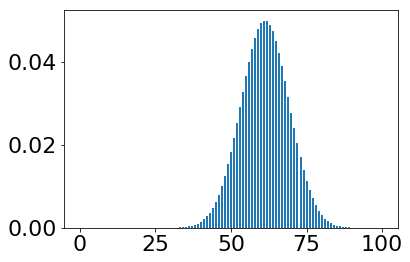

In [80]:
def getBias(hypothesis, data, y):
    
    # initialize prior
    prior = initPriors(hypothesis)

    for d in data:
        prior = updateWithBias(hypothesis, prior, d, y)

    # plotting code
    width = 1/1.5
    plt.bar(hypothesis, prior, width)
    fig = plt.gcf()

    # find the dataset mean
    mean = 0
    for i in range(0, len(prior)):
        mean = mean + hypothesis[i] * prior[i]

    print("Mean", mean)
    print(percentile(prior, hypothesis, 2.5),percentile(prior, hypothesis, 97.5))
    
    return mean

y = 0.3
numStudents = 242
getBias(hypothesis, data, y)